In [13]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from vicon.dereplication.derep import run_vsearch
from vicon.alignment.ref_align import run_viralmsa
from vicon.processing.sample_processing import process_all_samples
from vicon.visualization.plots import plot_non_gap_counts
from vicon.processing.coverage_analysis import abundant_kmers, crop_df, build_coverage_table, top_kmers_df, find_most_frequent_and_calculate_mismatches, get_i_th_kmers, select_best_kmers, count_seq_coverage, find_best_pair_kmer, calculate_kmer_coverage, find_kmer_position
from vicon.io.fasta import read_fasta_to_dataframe
from vicon.processing.sample_processing import pipeline_results_cleaner
from vicon.utils.helpers import count_non_gap_characters_from_dataframe, combine_fasta_files
from vicon.visualization.plots import plot_rel_cons
from vicon.io.fasta import create_folders_and_save_sequences, read_fasta, remove_first_record, read_fasta_to_dataframe
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import shutil

In [15]:

import os

# Get the base path from the environment variable
base_path = os.getenv("PROJECTS_PATH")
base_path = f"{base_path}vicon/"
print(base_path)

# no space in the heading
# no dash(-) in the sequence file
# sequences should be upper case


/fast/AG_Ohler/ekarimi/projects/vicon/


In [16]:
from vicon.utils.helpers import process_fasta_file


# Read and write fasta with uppercase sequences
input_file = f"{base_path}data/rotav/samples/segment_1/MO_Rotaseg1_3139-2.fasta"
output_file = f"{base_path}data/rotav/samples/segment_1/MO_Rotaseg1_3139-2_upper.fasta"

process_fasta_file(input_file, output_file)

input_file = f"{base_path}data/rotav/reference/RotaSeg1_iRefSeq.fasta"
output_file = f"{base_path}data/rotav/reference/RotaSeg1_iRefSeq_upper.fasta"

process_fasta_file(input_file, output_file)

# /fast/AG_Ohler/ekarimi/projects/vicon/data/rotav/samples/segment_6/sequences.fasta

In [17]:

VIRUS = "rotav_seg_1"
INPUT_SAMPLE = f"{base_path}data/rotav/samples/segment_1/MO_Rotaseg1_3139-2_upper.fasta"
INPUT_REFERENCE = f"{base_path}data/rotav/reference/RotaSeg1_iRefSeq_upper.fasta"

VIRALMSA_PATH = os.path.join(f"{base_path}scripts/ViralMSA.py")
OUTPUT_DIR = os.path.join(f"{base_path}results", VIRUS)

# Parameters for Tools
EMAIL = "email@address.com"
KMER_SIZE = 150
THRESHOLD = 140
L_GENE_START = -1
L_GENE_END = 5000

SAMPLE_DIR = os.path.dirname(INPUT_SAMPLE)
REFERENCE_DIR = os.path.dirname(INPUT_REFERENCE)

LOG_DIR = os.path.join(OUTPUT_DIR, "logs")
MAIN_DF_PATH = os.path.join(OUTPUT_DIR, "aggregated_results.csv")
KMER1_PATH = os.path.join(OUTPUT_DIR, "kmer1.csv")
KMER2_PATH = os.path.join(OUTPUT_DIR, "kmer2.csv")

# File Names
SAMPLE_NAME = os.path.basename(INPUT_SAMPLE)
REFERENCE_NAME = os.path.basename(INPUT_REFERENCE)

# Paths
DEREP_FASTA = os.path.join(SAMPLE_DIR, "derep.fasta")
CLUSTERS_UC = os.path.join(SAMPLE_DIR, "clusters.uc")
ALIGNED_DIR = os.path.join(SAMPLE_DIR, "aligned")
if os.path.exists(ALIGNED_DIR):
    shutil.rmtree(ALIGNED_DIR)
DEREP_FASTA_ALN = os.path.join(ALIGNED_DIR, "derep.fasta.aln")



# Example Usage of Paths and Functions
run_vsearch(INPUT_SAMPLE, DEREP_FASTA, CLUSTERS_UC)
run_viralmsa(
    email=EMAIL, 
    sample_fasta=DEREP_FASTA, 
    output_dir=ALIGNED_DIR, 
    reference_fasta=INPUT_REFERENCE, 
    script_path=VIRALMSA_PATH
)

remove_first_record(DEREP_FASTA_ALN, DEREP_FASTA_ALN)

# Process all samples and aggregate results
df, mask = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=THRESHOLD, only_valid_kmers=True)
df3, mask3 = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=KMER_SIZE-3, only_valid_kmers=True)

# Save aggregated results
# df.to_csv(MAIN_DF_PATH)
# print("Aggregated results saved.")

# df = pd.read_csv(MAIN_DF_PATH, index_col="SampleID")
df


vsearch v2.29.1_linux_x86_64, 1509.9GB RAM, 80 cores
https://github.com/torognes/vsearch

Dereplicating file /fast/AG_Ohler/ekarimi/projects/vicon/data/rotav/samples/segment_1/MO_Rotaseg1_3139-2_upper.fasta 100%
10371256 nt in 3139 seqs, min 3304, max 3304, avg 3304
Sorting 100%
2626 unique sequences, avg cluster 1.2, median 1, max 18
Writing FASTA output file 100%
Writing uc file, first part 100%
Writing uc file, second part 100%
The first record has been removed. Updated FASTA saved to: /fast/AG_Ohler/ekarimi/projects/vicon/data/rotav/samples/segment_1/aligned/derep.fasta.aln


,0,1,2,3,4,5,6,7,8,9,...,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154
SampleID,,,,,,,,,,,,,,,,,,,,,
LC172855_1_Human_rotavirus_A_Japan_2013_01;size=18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LC172928_1_Human_rotavirus_A_Japan_2013_03;size=16,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
"KC579520_1_Rotavirus_A_USA:_Washington,_DC_1988;size=15",1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
LC172860_1_Human_rotavirus_A_Japan_2013_01;size=9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MZ094512_1_Rotavirus_A_Kenya:_Kilifi_20_May_2013;size=9,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP848739_1_Rotavirus_A_Mozambique_2017;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PP848751_1_Rotavirus_A_Mozambique_2017;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PP848755_1_Rotavirus_A_Mozambique_2017;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


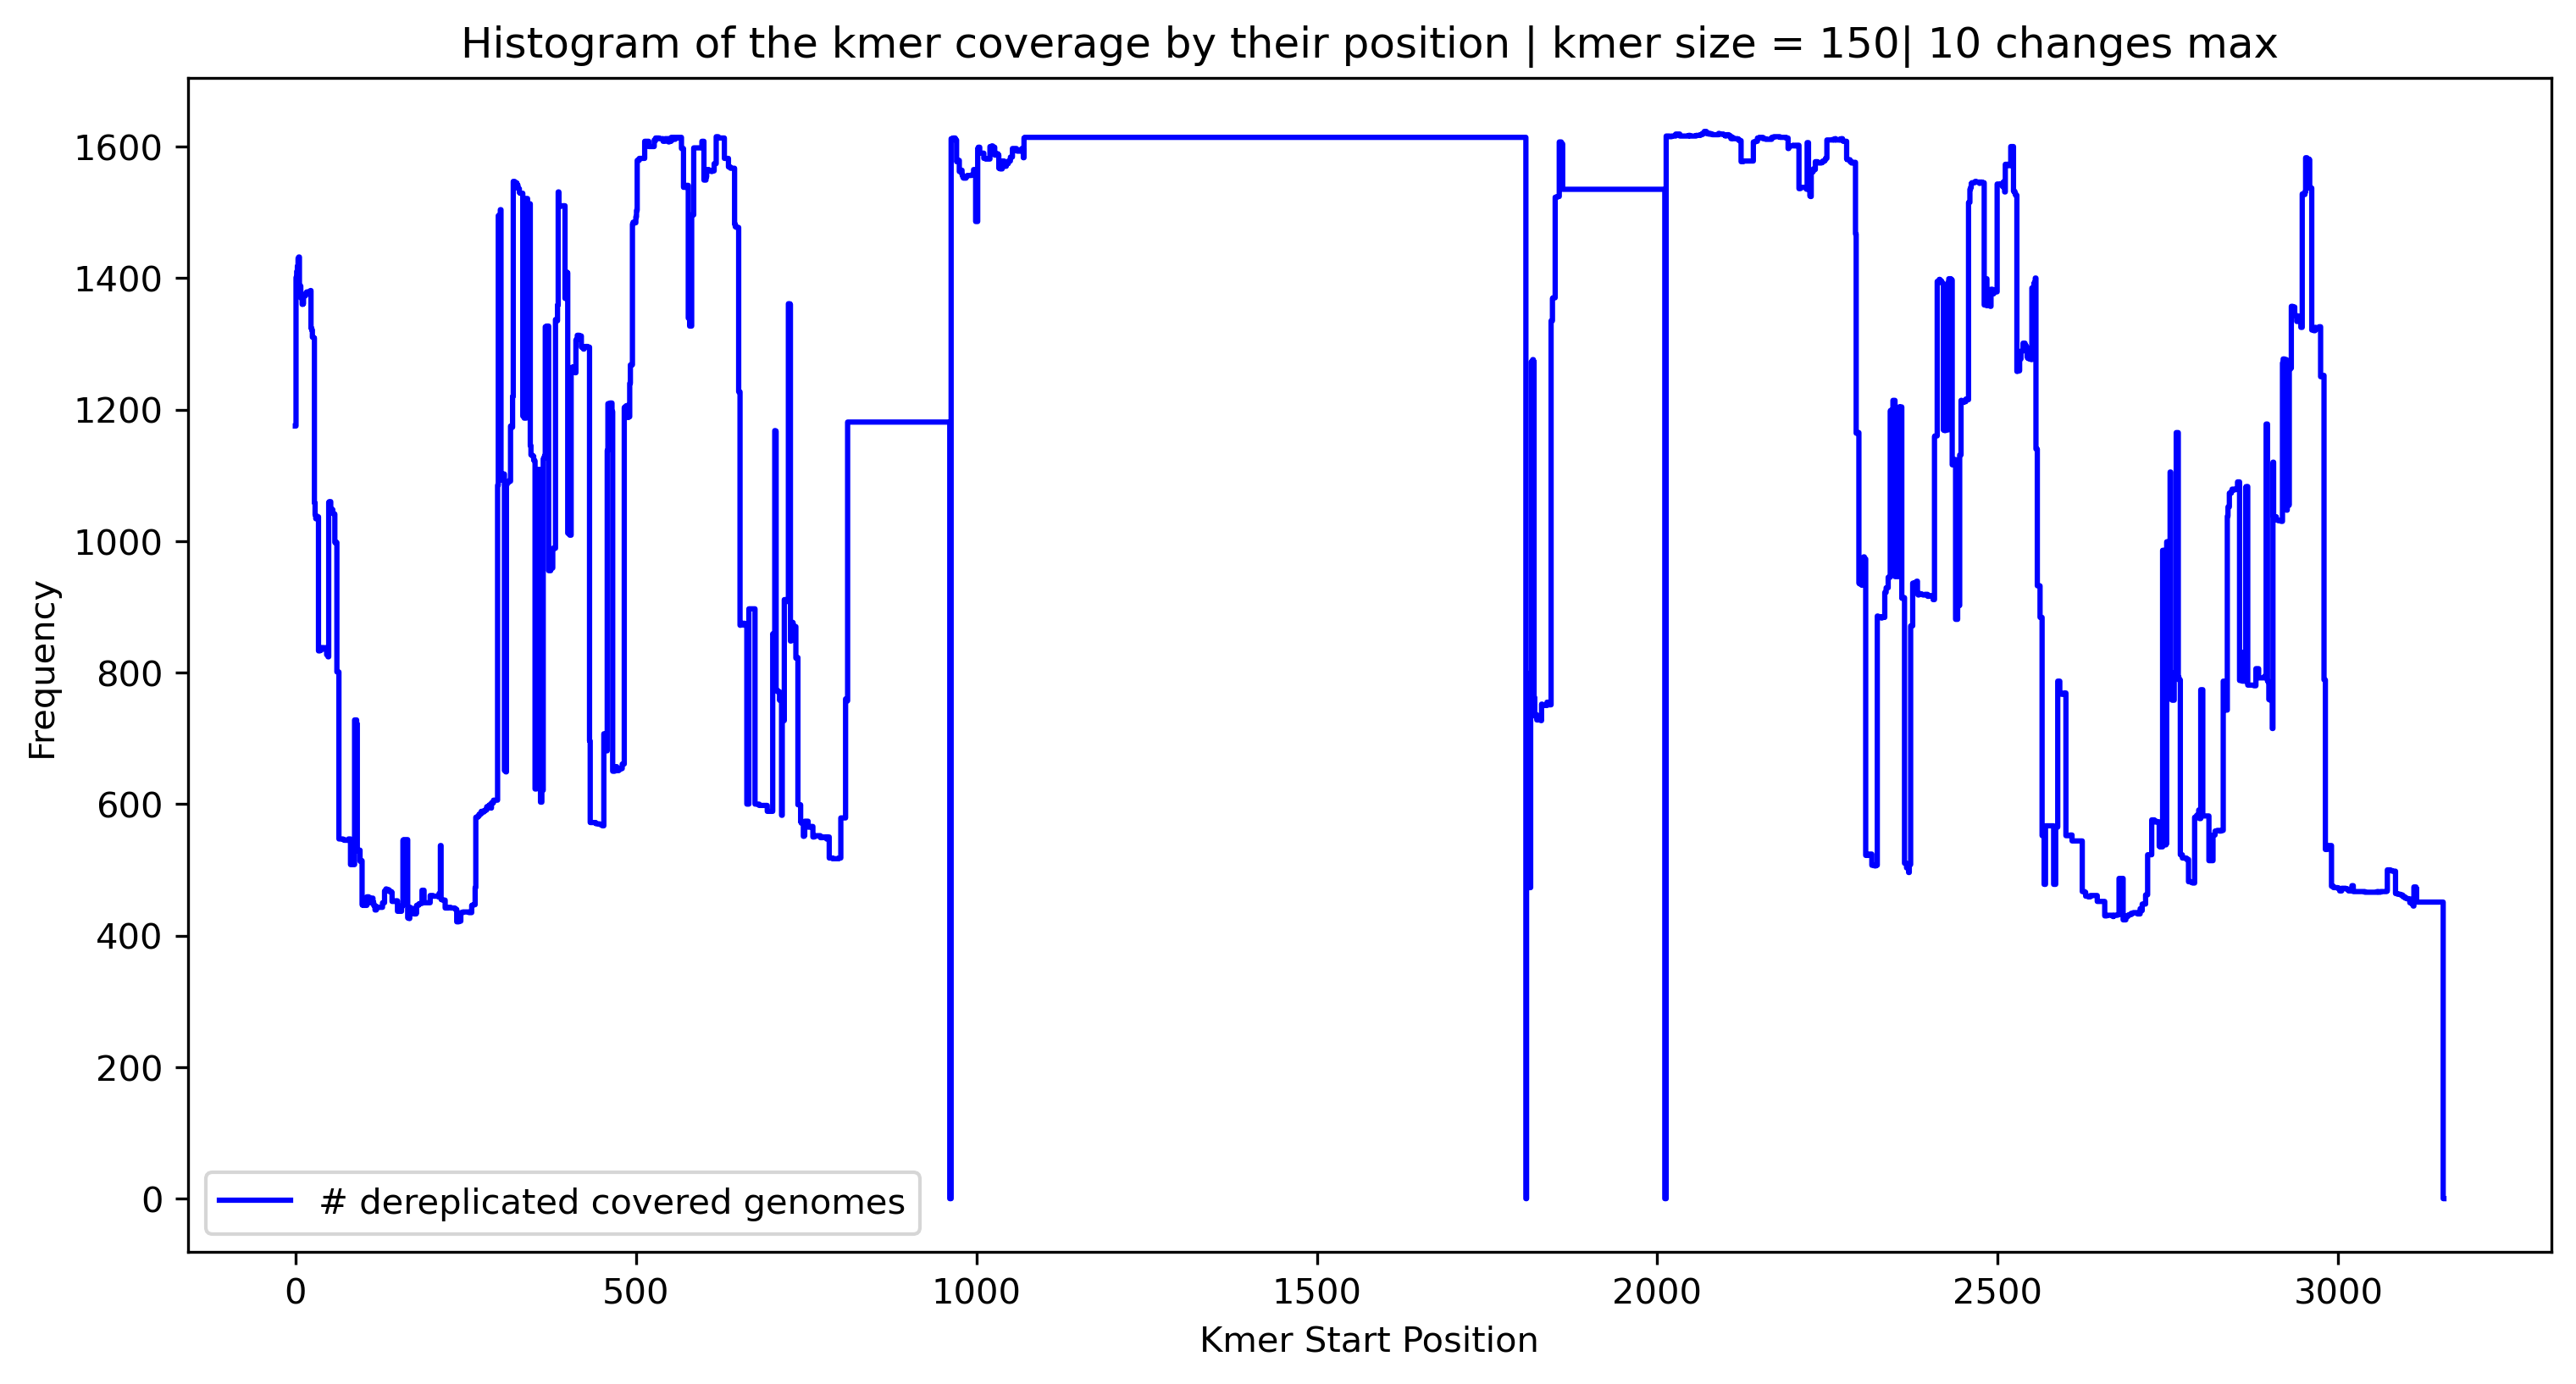

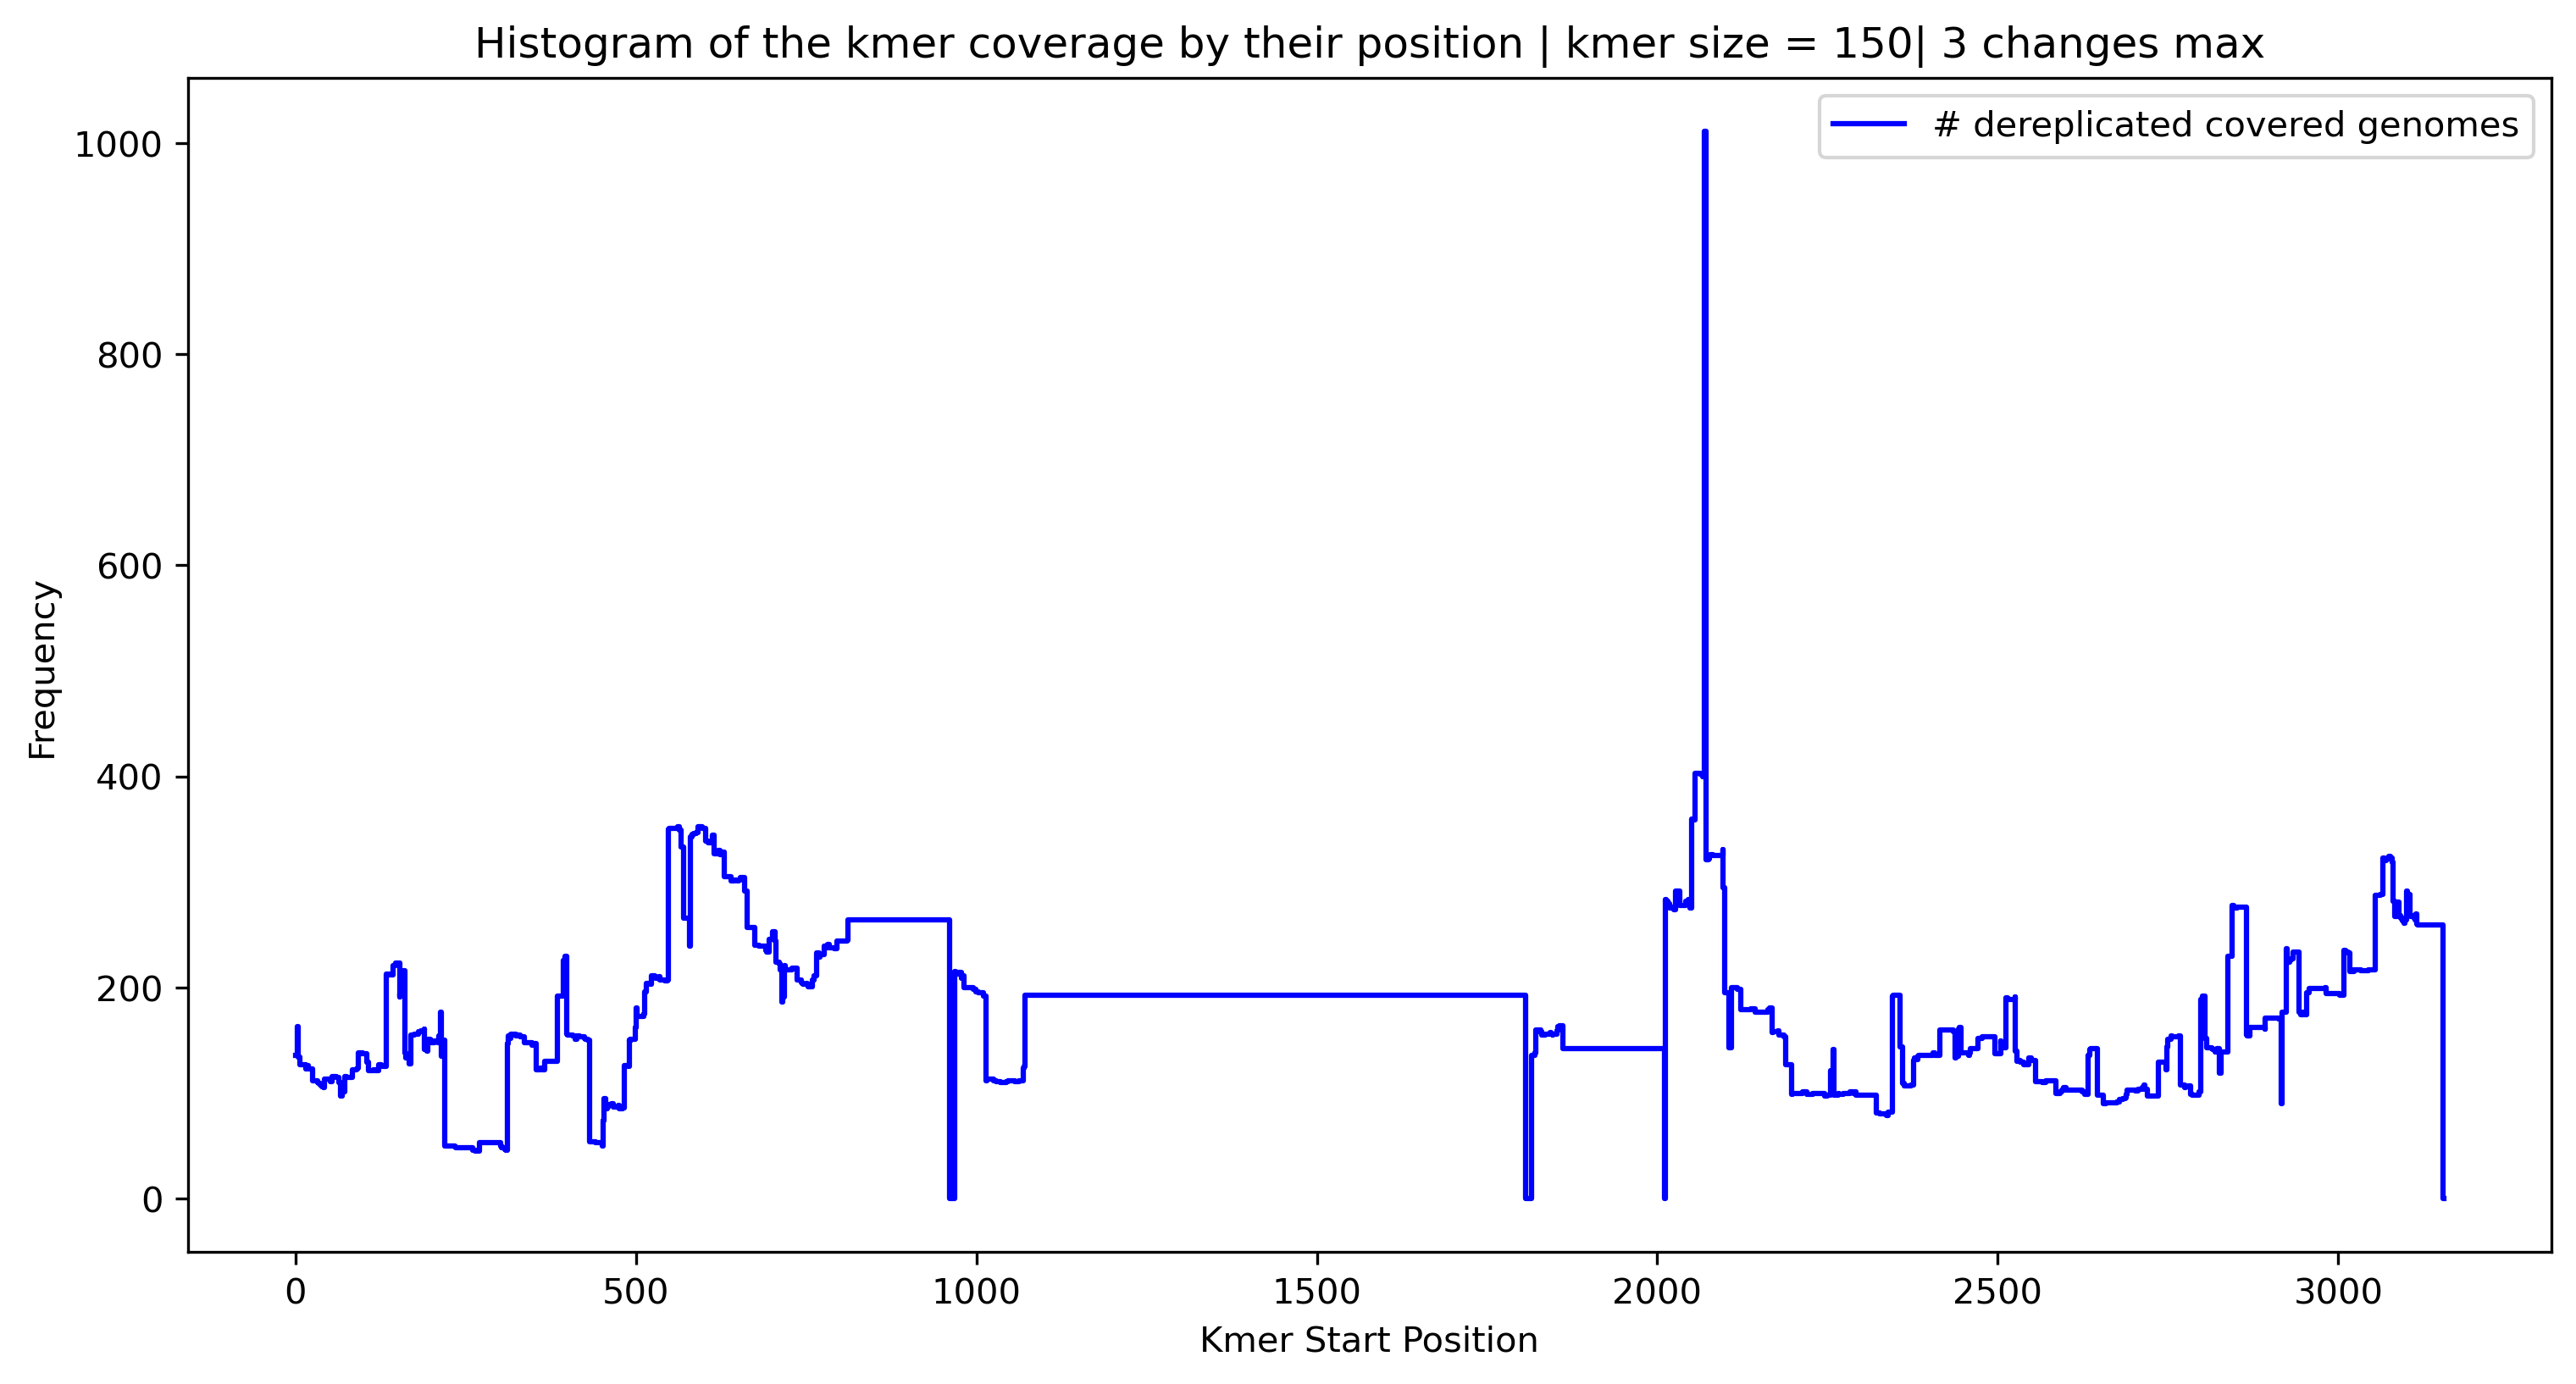

In [18]:
df.columns = df.columns.astype(int)
plot_rel_cons(df,kmer_size=KMER_SIZE, threshold=KMER_SIZE-THRESHOLD)
plot_rel_cons(df3, kmer_size=KMER_SIZE, threshold=3)

# Segment 1

In [19]:
# This should be defined based on the plots you get
COVERAGE_RATIO = 1000/ df3.shape[0]

# Crop DataFrame to L gene region and apply coverage threshold
ldf = crop_df(df, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask, window_size=150)
# ldf = crop_df(df3, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
# kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask3, window_size=KMER_SIZE)

Limiting DataFrame to gene region from position -1 to 5000
Minimum coverage threshold set to 1000 based on coverage ratio 0.38080731150038083
DataFrame cropped to 1026 columns with coverage above threshold.
Max coverage with 2 kmers: 0.595963442498096


In [20]:
df_ref = read_fasta_to_dataframe(INPUT_REFERENCE)
ref_seq = df_ref['Sequence'].values[0]

# Extract kmer sequences
kmer1_seq = ref_seq[kmer1:kmer1+KMER_SIZE]
kmer2_seq = ref_seq[kmer2:kmer2+KMER_SIZE]

print(f"Kmer1 sequence (position {kmer1}):\n{kmer1_seq}")
print(f"Kmer2 sequence (position {kmer2}):\n{kmer2_seq}")




df_kmers1, df_kmers2, df_samples = pipeline_results_cleaner(sample_address=DEREP_FASTA_ALN,
                                                kmer1=kmer1,
                                                kmer2=kmer2,
                                                drop_old_samples=False,
                                                kmer_size= 150,
                                                min_year=2020,
                                                threshold_ratio=0.01,
                                                drop_mischar_samples=True
                                                # drop_mutants=False
                                               )


df_kmers1.to_csv(KMER1_PATH)
df_kmers2.to_csv(KMER2_PATH)


df_counts = count_non_gap_characters_from_dataframe(df_kmers1, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers1 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers1_mutations.png"))

df_counts = count_non_gap_characters_from_dataframe(df_kmers2, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers2 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers2_mutations.png"))

Kmer1 sequence (position 2067):
AGAGCTGGTATAAACTTATTAAATAATGAGAAACGTGGACAAAGTACACAATGGGATCAAGCAGCTATTTTATATTCAAACTACATTGTTAACAAATTACGAGGATTTGAGACTGATAGAGAATTTATATTAACTAAAATTATACAAATG
Kmer2 sequence (position 2169):
GGATTTGAGACTGATAGAGAATTTATATTAACTAAAATTATACAAATGACGTCTGTAGCCATTACTGGATCACTAAGGTTGTTTCCTTCAGAACGAGTGTTAACTACTAATTCTACATTCAAAGTATTTGACTCAGAAGATTTCATTATA
Read 2626 samples from /fast/AG_Ohler/ekarimi/projects/vicon/data/rotav/samples/segment_1/aligned/derep.fasta.aln.
df_samples shape before dropping NaN years: (2626, 5)
df_samples shape after dropping NaN years: (2275, 5)
df_samples shape after dropping samples with non ATCG chars: (1605, 5)
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/rotav_seg_1/kmers1_mutations.png
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/rotav_seg_1/kmers2_mutations.png


In [21]:
df_samples

,ID,Sequence,kmer1,kmer2,year
2,"KC579520_1_Rotavirus_A_USA:_Washington,_DC_198...",AATGGGGAAGTACAATCTAATCTTGTCAGAATATTTATCATTTGTT...,AGAGCTGGTATAAACTTATTAAATAATGAGAAACGTGGACAAAGTA...,GGATTTGAGACTGATAGAGAATTTATACTAACTAAAATTATACAAA...,1988.0
4,MZ094512_1_Rotavirus_A_Kenya:_Kilifi_20_May_20...,-ATGGGGAAGTACAATCTAATCTTGTCAGAATATTTATCATTTGTT...,AGAGCTGGTATAAACTTATTAAATAATGAGAAGCGTGGACAAAGTA...,GGATTTGAGACTGATAGAGAATTTATATTAACTAAAATTATACAAA...,2013.0
5,"KC579475_1_Rotavirus_A_USA:_Washington,_DC_198...",AATGGGGAAGTACAATCTAATCTTGTCAGAATATTTATCATTTGTT...,AGAGCTGGTATAAACTTATTAAATAATGAGAAACGTGGACAAAGTA...,GGATTTGAGACTGATAGAGAATTTATACTAACTAAAATTATACAAA...,1988.0
6,JF490963_1_Rotavirus_A_human/Vanderbilt/VU08_0...,AATGGGGAAGTACAATCTAATCTTGTCAGAATATTTATCATTTGTT...,AGAGCTGGTATAAACTTATTAAATAATGAGAAGCGTGGACAAAGTA...,GGATTTGAGACTGATAGAGAATTTATATTAACTAAAATTATACAAA...,2008.0
7,LC751227_1_Human_rotavirus_A_Japan:Hokkaido_20...,-ATGGGGAAGTACAATCTAATCTTGTCAGAATATTTATCATTTGTT...,AGAGCTGGTATAAACTTATTAAATAACGAGAAGCGTGGACAAAGCA...,GGATTTGAGACTGATAGAGAATTTATATTAACTAAAATTATACAAA...,2015.0
...,...,...,...,...,...
2615,PP848516_1_Rotavirus_A_Mozambique_2018;size=1,AATGGGGAAGTACAATCTAATCTTGTCAGAATATTTATCATTTGTT...,AGAGCTGGTATAAACTTATTAAATAATGAGAAGCGTGGACAAAGTA...,GGATTTGAGACTGATAGAGAATTTATATTAACTAAAATTATACAAA...,2018.0
2616,PP848517_1_Rotavirus_A_Mozambique_2018;size=1,AATGGGGAAGTACAATCTAATCTTGTCAGAATATTTATCATTTGTT...,AGAGCTGGTATAAACTTATTAAATAATGAGAAGCGTGGACAAAGTA...,GGATTTGAGACTGATAGAGAATTTATATTAACTAAAATTATACAAA...,2018.0
2617,PP848518_1_Rotavirus_A_Mozambique_2017;size=1,AATGGGGAAGTACAATCTAATCTTGTCAGAATATTTATCATTTGTT...,AGAGCTGGTATAAACTTATTAAATAATGAGAAGCGTGGACAAAGTA...,GGATTTGAGACTGATAGAGAATTTATATTAACTAAAATTATACAAA...,2017.0
2618,PP848519_1_Rotavirus_A_Mozambique_2017;size=1,AATGGGGAAGTACAATCTAATCTTGTCAGAATATTTATCATTTGTT...,AGAGCTGGTATAAACTTATTAAATAATGAGAAGCGTGGACAAAGTA...,GGATTTGAGACTGATAGAGAATTTATATTAACTAAAATTATACAAA...,2017.0


In [22]:
kk1 = 'AATGATAGCCGAAAATATTTTACAATTCTTCCCTGAGAGTTTGACAAGATATGGTGATCTAGAGCTTCAAAAGATATTAGAATTAAAAGCAGGAATAAGCAACAAGTCAAATCGTTATAATGATAACTACAACAATTATATCAGTAAATG'
kk2 = 'TGTTTTCTTTAATGCTTATAAGACTTATTTGCTATGTTTTCATAGAGGTTATGGTAAAGCAAAATTAGAATGTGATATGAACACTTCAGATCTTCTTTGTGTTTTGGAGTTAATAGACAGTAGCTACTGGAAATCTATGTCTAAAGTTTT'


In [23]:
k1_pos = find_kmer_position(df_ref, kk1, window_size=150)

In [24]:
k2_pos = find_kmer_position(df_ref, kk2, window_size=150)

In [26]:
# calculate_kmer_coverage(ldf, DEREP_FASTA_ALN, mask3, k1_pos, k2_pos, window_size=150)/ldf.shape[0]